# 이미지 얼굴 검출
- pip install cv2

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

img = cv2.imread('./images/image1.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# scaleFactor : 각 이미지크기에서 이미지크기가 감소되는 양
# 크기를 줄임으로써 감지 모델과 일치할 확률 증가하지만 더 느려짐
# minNeighbors : 각 후보 사각형을 유지해야하는 이웃 수를 지정
#, 값이 높을 수록 탐지는 적지만 품질은 높아짐
faces = face_cascade.detectMultiScale(gray_img,scaleFactor=1.1, minNeighbors=5)
print(faces)
for (x,y,w,h) in faces:
    print(1)
    img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    y_ = y
    y_h = y+h
    x_ = x
    x_w = x+w
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[[213 115 208 208]]
1


In [2]:
print("{} 순서대로 x,y,w,h".format(faces))

[[213 115 208 208]] 순서대로 x,y,w,h


# 얼굴만 자르고 resize

True

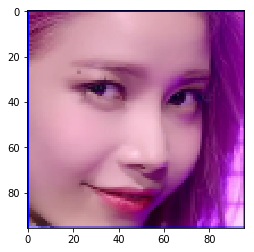

In [3]:
reduction_img = img[y_:y_h, x_:x_w]
reduction_img = cv2.resize(reduction_img,dsize=(96,96))
plt.imshow(reduction_img)
reduction_img = cv2.cvtColor(reduction_img, cv2.COLOR_BGR2RGB)
# 저장
cv2.imwrite('./images/reduction_img.jpg', reduction_img)

In [4]:
# # plt.imshow(img1[115:115+208, 213:213+208])
# img = img[faces[0,1]:faces[0,1]+faces[0,3],faces[0,0]:faces[0,0]+faces[0,2]]
# #img1 = cv2.resize(img1,dsize=(24,24), interpolation = cv2.INTER_AREA)
# img = cv2.resize(img,dsize=(96,96))
# plt.imshow(img)

# 이미지에서 landmark detection
- pip install dlib하면 되는데 error
    - 해결 방법
        - https://stackoverflow.com/questions/41912372/dlib-installation-on-windows-10
        - pip install cmake
        - install visual studio build tools
        - In Visual Studio 2017 go to the Individual Components tab, Visual C++ Tools for Cmake, and check the checkbox under the "Compilers, build tools and runtimes" section.
        - pip install dlib
- 근데 난 아래 처럼 진행함
    - visual studio도 깔려 있었어서 그냥 바로 cmake 후 dlib
    - pip install cmake
    - pip install dlib

## cmak이란
- 기존 프로젝트 구성은 특정 IDE나 특정 빌드 도구에 한정되어 하나의 형식으로 한정되게 되는데 (예:visual studio의 sln/vcproj를 다른 플랫폼에서 바로 빌드할 수 없음) 이런 문제점을 CMake를 통해 해결할 수 있음


## dlib란
- 이미지 처리 및 기계 학습, 얼굴 인식 등을 할 수 있는 c++로 개발된 고성능의 라이브러리
- opencv와 뭐가 다른건가 싶겠지만 
    - 얼굴인식에 관해서는 dlib가 강력함
    - 밝기가 변하는 방향을 고려해서 얼굴인식
    ![image](https://user-images.githubusercontent.com/28910538/56934340-8b35d100-6b26-11e9-82d0-a98862c3d815.png)

    - 이미지 처리에 대해서는 opencv가 강력

left : 216
top : 118
right : 439
bottom : 341


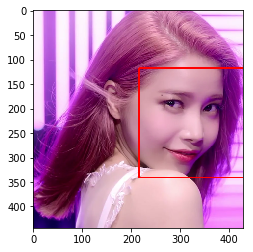

In [5]:
import dlib
import matplotlib.pyplot as plt

img = cv2.imread('./images/image1.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dlib_detector = dlib.get_frontal_face_detector()
detected_faces = dlib_detector(gray_img, 1)

for d in detected_faces:
    print("left : {}".format(d.left()))
    print("top : {}".format(d.top()))
    print("right : {}".format(d.right()))
    print("bottom : {}".format(d.bottom()))
    img = cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), (0,0,255),2)
    
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)